In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
# Traemos los datos
df= pd.read_csv('D:\Desktop\PI02\df_train_final.csv')

In [8]:
columns_names = list(df.columns.values)
columns_names.remove('Unnamed: 0')
columns_names.remove('low')

In [9]:
#Definimos variables
X= df[columns_names]
y= df[['low']]

In [10]:
#Separamos el modelo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(191195, 86) (191195, 1) (81941, 86) (81941, 1)


In [11]:
#Entrenamos el modelo y predecimos
clf = DecisionTreeClassifier(max_depth = 100, random_state = 42) 
clf.fit(X_train.values,y_train.values)
y_pred = clf.predict(X_test.values)

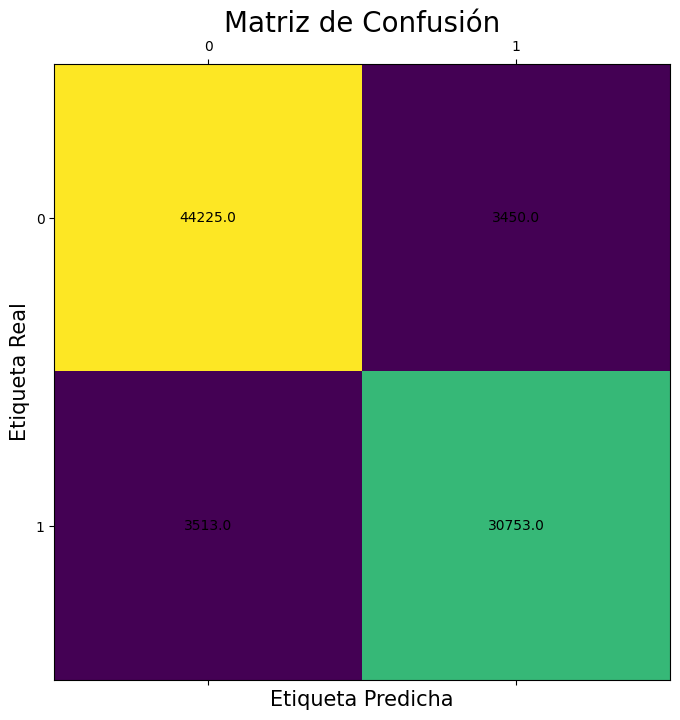

In [12]:
# Evaluamos graficamente con una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Real', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [13]:
# Evaluamos con metricas 
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Accuracy:  0.9150242247470741
Recall:  0.8974785501663457
F1 Score:  0.8983043421110284


In [14]:
# Vemos los feature con mas importancia
print('Feature importance: ', clf.feature_importances_)

Feature importance:  [1.96596804e-01 2.55991447e-02 2.03705978e-02 7.64770918e-03
 9.34255004e-03 1.31013069e-02 6.08741614e-03 1.54492030e-03
 9.08517816e-03 1.79908929e-01 3.54896579e-01 7.72723161e-03
 0.00000000e+00 1.88479044e-03 2.81557175e-04 1.36426481e-03
 1.18189243e-04 9.21338263e-03 1.10136294e-04 1.95707191e-05
 2.85158513e-04 1.68629642e-03 1.93676322e-03 2.58759587e-03
 2.77769228e-03 1.21630492e-03 4.88846338e-03 2.79646840e-02
 1.95944203e-02 4.63193772e-03 3.58243622e-03 1.01479316e-03
 5.82560742e-03 3.44195394e-03 1.45735954e-04 1.67066231e-05
 6.45042725e-04 5.77593726e-04 3.07229148e-04 9.75763728e-03
 2.73212839e-03 4.52875873e-04 2.17874970e-03 1.42795409e-04
 1.66259477e-02 1.21299666e-03 0.00000000e+00 1.34908947e-03
 2.20488902e-04 3.38598208e-03 4.60838985e-04 2.58285115e-04
 1.30000032e-03 9.79271566e-04 1.94628018e-04 1.14149058e-03
 2.09024169e-05 6.28449115e-04 3.34174893e-03 9.37477916e-04
 9.09733370e-04 2.16263515e-04 2.60661103e-03 1.88174050e-05
 2.

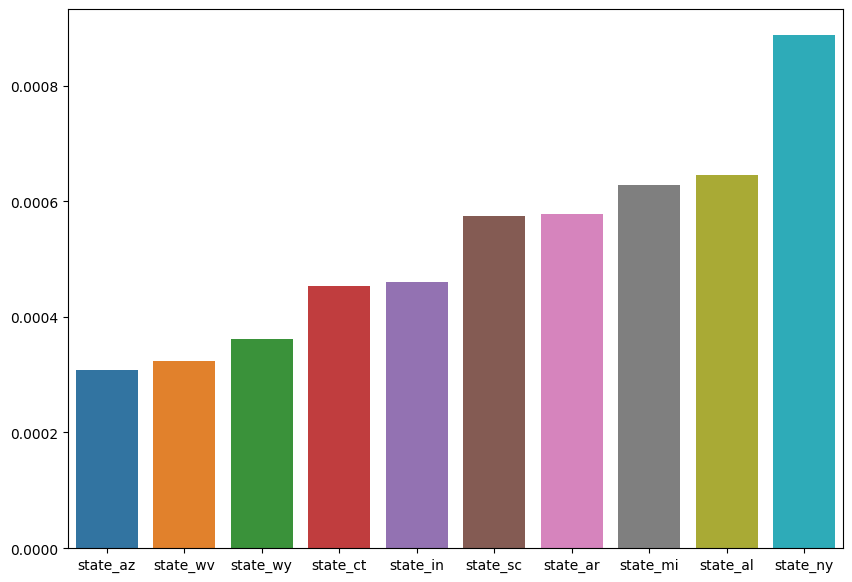

In [15]:
# Diagrama de barras de la importancia de los atributos

importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[75:85]

plt.figure(figsize = (10,7))
sns.barplot(x = columns[indices], y = importances[indices])
plt.show()

## Random Forest para mejorar los hiperparámetros

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [5,30,50,100,200,350,500]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

5


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:584: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


30


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


50


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


100


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


200


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


350


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


500


C:\Users\Dell\AppData\Local\Temp\ipykernel_14480\1936749981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


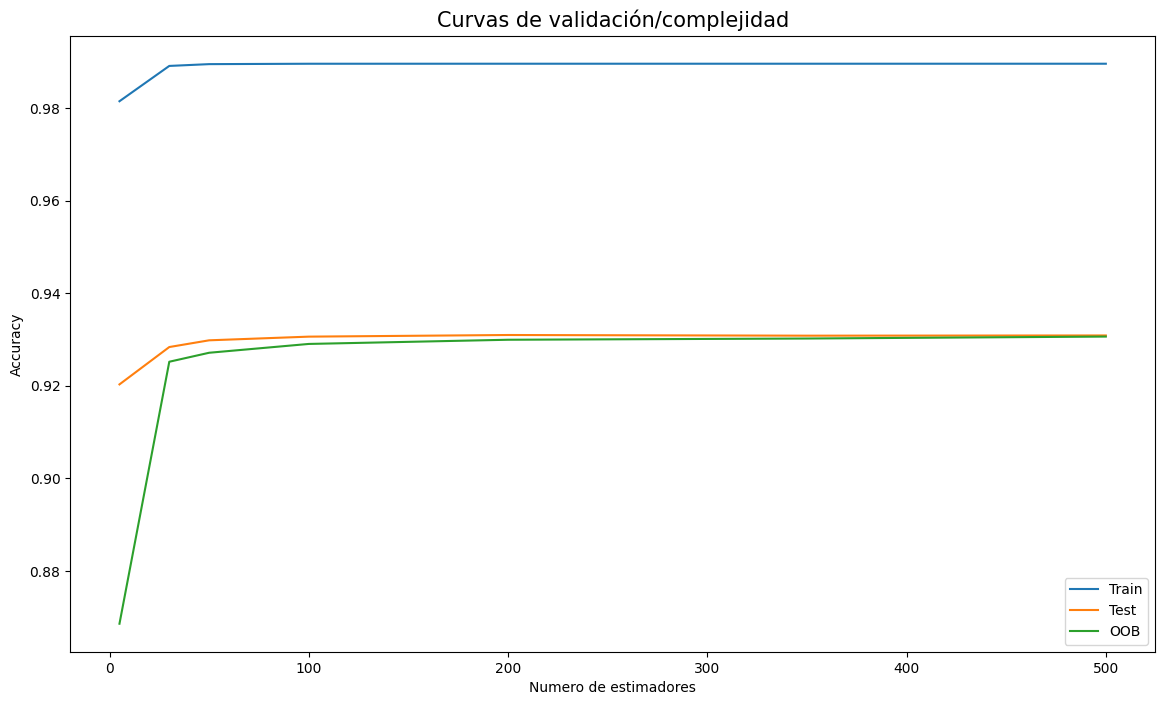

In [18]:
plt.figure(figsize = (14,8))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de validación/complejidad', fontsize = 15)
# plt.xlim(0,50)
plt.show()

In [19]:
print(f"Valor óptimo de n_estimators: {N_estimadores[np.argmax(oob_scores)]}")
#para no caer en overfitting elegimos 100

Valor óptimo de n_estimators: 500
